In [1]:
#OK Lets try importing ROOT, and uproot
import ROOT
#ROOT.gROOT.Reset()
import uproot

Welcome to JupyROOT 6.14/04


In [2]:
#we know the files are located here: /project/def-psavard/MASSSCRATCHDIR/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/H4l/
#Lets take a look inside of that directory:
import os
dir = "/project/def-psavard/MASSSCRATCHDIR/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/H4l/2018/MiniTrees/Prod_v24/AntiKt4EMPFlow/"
os.system("ls {}".format(dir))

0

mc16a
mc16d
mc16e


In [3]:
#There are files stored for mc16a, mc16d, and mc16e. mc16a is the simulation for 2015 + 2016 data, mc16d is the simulation
#for 2017 data and mc16e is the simulation for 2018 data. Lets take a look at the files present:

In [4]:
dir_mc16a = os.path.join(dir, "mc16a")
os.system("ls {}".format(dir_mc16a))

0

Nominal
Systematics


In [5]:
#Don't worry about systematics, lets just focus on Nominal simulation 
dir_mc16a = os.path.join(dir, "mc16a", "Nominal")
os.system("ls {}".format(dir_mc16a))

0

mc16_13TeV.344973.aMcAtNloPythia8EvtGen_A14NNPDF23LO_bbH125_yb2_ZZ4lep_noTau.root
mc16_13TeV.344974.aMcAtNloPythia8EvtGen_A14NNPDF23LO_bbH125_ybyt_ZZ4lep_noTau.root
mc16_13TeV.345060.PowhegPythia8EvtGen_NNLOPS_nnlo_30_ggH125_ZZ4l.root
mc16_13TeV.345066.PowhegPythia8EvtGen_NNPDF3_AZNLO_ggZH125_ZZ4lepZinc.root
mc16_13TeV.345576.PowhegPythia8EvtGen_NNLOPS_nnlo_30_ggH123_ZZ4l.root
mc16_13TeV.345577.PowhegPythia8EvtGen_NNLOPS_nnlo_30_ggH124_ZZ4l.root
mc16_13TeV.345578.PowhegPythia8EvtGen_NNLOPS_nnlo_30_ggH126_ZZ4l.root
mc16_13TeV.345579.PowhegPythia8EvtGen_NNLOPS_nnlo_30_ggH127_ZZ4l.root
mc16_13TeV.345708.Sherpa_222_NNPDF30NNLO_ggllllNoHiggs_0M4l130.root
mc16_13TeV.345709.Sherpa_222_NNPDF30NNLO_ggllllNoHiggs_130M4l.root
mc16_13TeV.346228.PowhegPy8EG_NNPDF30_AZNLOCTEQ6L1_VBFH125_ZZ4lep_notau.root
mc16_13TeV.346340.PowhegPy8EG_A14NNPDF23_NNPDF30ME_ttH125_ZZ4l_allhad.root
mc16_13TeV.346341.PowhegPy8EG_A14NNPDF23_NNPDF30ME_ttH125_ZZ4l_semilep.root
mc16_13TeV.346342.PowhegPy8EG_A14NNPDF23_NNPDF3

In [6]:
#We can see a large set of simulated samples. Lets take a ggH/VBF 125 GeV Sample as signal, and a qqZZ sample as background
signal_files = ["mc16_13TeV.345060.PowhegPythia8EvtGen_NNLOPS_nnlo_30_ggH125_ZZ4l.root", \
                "mc16_13TeV.346228.PowhegPy8EG_NNPDF30_AZNLOCTEQ6L1_VBFH125_ZZ4lep_notau.root"]
background_files = ["mc16_13TeV.364250.Sherpa_222_NNPDF30NNLO_llll.root",\
                    "mc16_13TeV.364251.Sherpa_222_NNPDF30NNLO_llll_m4l100_300_filt100_150.root",\
                    "mc16_13TeV.364252.Sherpa_222_NNPDF30NNLO_llll_m4l300.root"]
location = "/project/def-psavard/MASSSCRATCHDIR/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/H4l/2018/MiniTrees/Prod_v24/AntiKt4EMPFlow/__CAMPAIGN__/Nominal/"
full_signal_files = []
for s in signal_files:
    for campaign in ["mc16a", "mc16d", "mc16e"]:
        full_signal_files.append(os.path.join(location.replace("__CAMPAIGN__", campaign), s))
full_bkg_files = []
for b in background_files:
    for campaign in ["mc16a", "mc16d", "mc16e"]:
        full_bkg_files.append(os.path.join(location.replace("__CAMPAIGN__", campaign), b))
        

In [7]:
full_bkg_files

['/project/def-psavard/MASSSCRATCHDIR/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/H4l/2018/MiniTrees/Prod_v24/AntiKt4EMPFlow/mc16a/Nominal/mc16_13TeV.364250.Sherpa_222_NNPDF30NNLO_llll.root',
 '/project/def-psavard/MASSSCRATCHDIR/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/H4l/2018/MiniTrees/Prod_v24/AntiKt4EMPFlow/mc16d/Nominal/mc16_13TeV.364250.Sherpa_222_NNPDF30NNLO_llll.root',
 '/project/def-psavard/MASSSCRATCHDIR/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/H4l/2018/MiniTrees/Prod_v24/AntiKt4EMPFlow/mc16e/Nominal/mc16_13TeV.364250.Sherpa_222_NNPDF30NNLO_llll.root',
 '/project/def-psavard/MASSSCRATCHDIR/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/H4l/2018/MiniTrees/Prod_v24/AntiKt4EMPFlow/mc16a/Nominal/mc16_13TeV.364251.Sherpa_222_NNPDF30NNLO_llll_m4l100_300_filt100_150.root',
 '/project/def-psavard/MASSSCRATCHDIR/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/H4l/2018/MiniTrees/Prod_v24/AntiKt4EMPFlow/mc16d/Nominal/mc16_13TeV.364251.Sherpa_222_NNPDF30NNLO_llll_m4l100_300_filt100_

In [8]:
full_signal_files

['/project/def-psavard/MASSSCRATCHDIR/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/H4l/2018/MiniTrees/Prod_v24/AntiKt4EMPFlow/mc16a/Nominal/mc16_13TeV.345060.PowhegPythia8EvtGen_NNLOPS_nnlo_30_ggH125_ZZ4l.root',
 '/project/def-psavard/MASSSCRATCHDIR/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/H4l/2018/MiniTrees/Prod_v24/AntiKt4EMPFlow/mc16d/Nominal/mc16_13TeV.345060.PowhegPythia8EvtGen_NNLOPS_nnlo_30_ggH125_ZZ4l.root',
 '/project/def-psavard/MASSSCRATCHDIR/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/H4l/2018/MiniTrees/Prod_v24/AntiKt4EMPFlow/mc16e/Nominal/mc16_13TeV.345060.PowhegPythia8EvtGen_NNLOPS_nnlo_30_ggH125_ZZ4l.root',
 '/project/def-psavard/MASSSCRATCHDIR/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/H4l/2018/MiniTrees/Prod_v24/AntiKt4EMPFlow/mc16a/Nominal/mc16_13TeV.346228.PowhegPy8EG_NNPDF30_AZNLOCTEQ6L1_VBFH125_ZZ4lep_notau.root',
 '/project/def-psavard/MASSSCRATCHDIR/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/H4l/2018/MiniTrees/Prod_v24/AntiKt4EMPFlow/mc16d/Nominal/mc16_

In [9]:
#Lets take a look at the contents of one of the signal files:
f = uproot.open(full_signal_files[0])

In [10]:
f.keys()
#we can see that there a few trees and a histogram inside of the file. Don't worry if there seems to be two trees,
#reading only one should be good enough

[b'tree_incl_all;9', b'tree_incl_all;8', b'CountingHist;1', b'MetaData;1']

In [11]:
t = f["tree_incl_all"]

In [12]:
t.keys()
#This prints all of the variables stored inside of the tree

[b'bcid',
 b'cand_index',
 b'changedQuadForME',
 b'event_type',
 b'fsr_associated_lepton',
 b'fsr_type',
 b'hasExtraLepNominal',
 b'lbn',
 b'n_extraLep',
 b'n_jets',
 b'npv',
 b'prod_type',
 b'prod_type_SB',
 b'prod_type_fine',
 b'random_run',
 b'run',
 b'truth_decay',
 b'truth_event_type',
 b'truth_pairing',
 b'event',
 b'BDT_Massdiscriminant',
 b'BDT_discriminant',
 b'KD_discriminant',
 b'ave_int_per_xing',
 b'eta4l_fsr',
 b'eta4l_truth_born',
 b'eta4l_truth_matched_bare',
 b'eta4l_unconstrained',
 b'fsr_dr',
 b'fsr_eta',
 b'fsr_f1',
 b'fsr_phi',
 b'fsr_pt',
 b'fsr_pt_constrained',
 b'm4l_constrained',
 b'm4l_constrained_HM',
 b'm4l_fsr',
 b'm4l_truth_born',
 b'm4l_truth_matched_bare',
 b'm4l_unconstrained',
 b'm4lerr_constrained',
 b'm4lerr_fsr',
 b'm4lerr_unconstrained',
 b'mZ1_constrained',
 b'mZ1_fsr',
 b'mZ1_truth_born',
 b'mZ1_truth_matched_bare',
 b'mZ1_unconstrained',
 b'mZ2_constrained',
 b'mZ2_fsr',
 b'mZ2_truth_born',
 b'mZ2_truth_matched_bare',
 b'mZ2_unconstrained',
 b'm

In [13]:
#Lets try to make an invariant mass plot:
dataframe = t.pandas.df(["m4l_constrained", "weight", "m4lerr_constrained"])

In [14]:
arrays = t.arrays(["m4l_constrained", "weight", "m4lerr_constrained"])

In [15]:
arrays

{b'm4l_constrained': array([121.05567, 124.53856, 128.15407, ..., 126.92762, 123.69727,
         96.59607], dtype=float32),
 b'weight': array([0.00013737, 0.0001222 , 0.00010678, ..., 0.00011142, 0.00013013,
        0.00017581]),
 b'm4lerr_constrained': array([1.2793553, 1.2732085, 2.4      , ..., 1.959439 , 1.2212908,
        1.2068623], dtype=float32)}

In [16]:
dataframe
#we can print the contents of the dataframe

m4l_constrained    weight  m4lerr_constrained
entry                                                
0            121.055672  0.000137            1.279355
1            124.538559  0.000122            1.273208
2            128.154068  0.000107            2.400000
3            125.442368  0.000112            1.627248
4            124.345390  0.000174            1.231672
5            126.476189  0.000178            1.211214
6            124.606735  0.000124            1.549351
7            123.203606  0.000120            1.124647
8            118.603485  0.000197            2.349211
9            124.931931  0.000142            1.544392
10           124.591026  0.000097            1.570532
11           128.778885  0.000159            3.486765
12           125.291611  0.000222            1.197451
13           126.394852  0.000164            1.057946
14           129.062469  0.000162            1.674840
15           124.337875  0.000075            1.612616
16           119.018456  0.000180            1.950154
17           124.400719  0.000161            0.945694
18           122.757286  0.000100            1.744821
19           127.518013  0.000115            2.005169
20           125.864365  0.000126            1.829100
21           130.396286  0.000123            1.614616
22           124.168365  0.000131            1.807990
23           124.584312  0.000126            1.137664
24           124.641167  0.000144            1.033141
25           128.454819  0.000103            2.019461
26           124.232246  0.000165            1.729884
27           124.743088  0.000100            1.984777
28           121.482491  0.000154            1.500753
29           107.383110  0.000161            1.803774
...                 ...       ...                 ...
399896       122.853851  0.000121            1.895467
399897       123.468803  0.000162            0.948111
399898       124.140160  0.000163            2.966814
399899       116.372765  0.000163            1.706311
399900       118.117165  0.000167            3.631371
399901       125.542030  0.000090            2.069343
399902       122.431122  0.000145            1.981612
399903       122.432045  0.000128            1.752004
399904       125.408646  0.000189            1.136272
399905       124.116440  0.000139            1.210140
399906       124.177528  0.000070            1.453044
399907       122.454613  0.000095            1.678314
399908       122.433815  0.000085            2.441771
399909       126.671616  0.000125            2.230207
399910       128.813080  0.000195            2.501952
399911       127.040184  0.000149            2.167022
399912       123.697670  0.000135            1.380443
399913       127.102066  0.000157            2.346389
399914       124.962715  0.000121            0.978390
399915       123.640625  0.000080            3.054924
399916       124.124817  0.000093            3.695874
399917       125.522339  0.000151            1.435976
399918       124.438438  0.000079            2.047844
399919       122.736954  0.000089            1.652438
399920       125.013695  0.000110            1.151769
399921       123.309181  0.000140            0.933262
399922       124.754616  0.000091            1.281833
399923       126.927620  0.000111            1.959439
399924       123.697273  0.000130            1.221291
399925        96.596069  0.000176            1.206862

[399926 rows x 3 columns]


Applying ATLAS style settings...



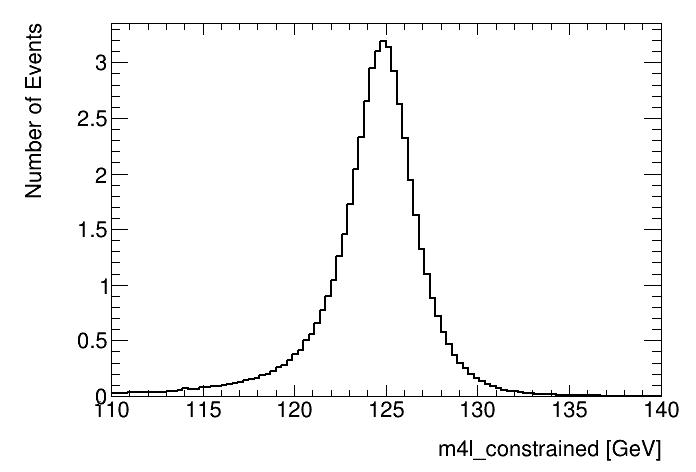

In [17]:
#Lets make the m4l plot
import root_numpy
from atlasplots import atlas_style as astyle
astyle.SetAtlasStyle()
hist = ROOT.TH1D("hist", "hist", 100, 110.0, 140.0)
root_numpy.fill_hist(hist, dataframe["m4l_constrained"].values, dataframe["weight"].values)
c1 = ROOT.TCanvas("","")
hist.Draw("HIST")
hist.GetXaxis().SetTitle("m4l_constrained [GeV]")
hist.GetYaxis().SetTitle("Number of Events")
c1.Draw()

In [18]:
#Lets have more fun, and try to make a correlation plot
import matplotlib.pyplot as plt
import numpy as np
cmap=plt.get_cmap('Reds')
binsx = np.linspace(120.0, 130.0, 100)
binsy = np.linspace(0.5, 3.0, 20)
#lets reweight everything to unity in bins of m4lerr on the y-axis
weights = dataframe["weight"].values
for blow, bhigh in zip(binsy[:-1], binsy[0:]):
    selection = (dataframe["m4lerr_constrained"].values > blow) & (dataframe["m4lerr_constrained"].values < bhigh)
    weights[selection] = weights[selection]/np.sum(weights[selection])

plt.hist2d(dataframe["m4l_constrained"].values, dataframe["m4lerr_constrained"].values, weights=weights, bins=(binsx,binsy), cmap=cmap)
bar = plt.colorbar()
plt.xlabel("m4l_constrained [GeV]")
plt.ylabel("m4lerr_constrained [GeV]")
bar.set_label("Number of Events")

In [19]:
#Lets make a signal and background plot:
signal_dataframe = []
variables = ["m4l_constrained", "weight"]
for sf in full_signal_files:
    signal_dataframe.append(uproot.open(sf)["tree_incl_all"].pandas.df(variables))
import pandas as pd
signal_dataframe = pd.concat(signal_dataframe)

background_dataframe = []
variables = ["m4l_constrained", "weight"]
for bf in full_bkg_files:
    background_dataframe.append(uproot.open(bf)["tree_incl_all"].pandas.df(variables))
import pandas as pd
background_dataframe = pd.concat(background_dataframe)

In [20]:
signal_dataframe

m4l_constrained    weight
entry                            
0            121.055672  0.000137
1            124.538559  0.000122
2            128.154068  0.000107
3            125.442368  0.000112
4            124.345390  0.000174
5            126.476189  0.000178
6            124.606735  0.000124
7            123.203606  0.000120
8            118.603485  0.000197
9            124.931931  0.000142
10           124.591026  0.000097
11           128.778885  0.000159
12           125.291611  0.000222
13           126.394852  0.000164
14           129.062469  0.000162
15           124.337875  0.000075
16           119.018456  0.000180
17           124.400719  0.000161
18           122.757286  0.000100
19           127.518013  0.000115
20           125.864365  0.000126
21           130.396286  0.000123
22           124.168365  0.000131
23           124.584312  0.000126
24           124.641167  0.000144
25           128.454819  0.000103
26           124.232246  0.000165
27           124.743088  0.000100
28           121.482491  0.000154
29           107.383110  0.000161
...                 ...       ...
675754       123.510429  0.000006
675755       124.375771  0.000011
675756       127.131714  0.000011
675757       125.701920  0.000004
675758       128.715988  0.000011
675759       125.412315  0.000016
675760       126.355797  0.000013
675761       121.472404  0.000011
675762       125.116508  0.000011
675763       125.445389  0.000010
675764       128.366318  0.000011
675765       123.253876  0.000013
675766       124.480324  0.000010
675767       126.408165  0.000014
675768       122.726334  0.000002
675769       124.372421  0.000012
675770       124.624992  0.000004
675771       135.477829  0.000007
675772       124.646744  0.000012
675773       124.186623  0.000000
675774       122.426239  0.000015
675775       128.869888  0.000011
675776       123.561897  0.000011
675777       120.649101  0.000012
675778       125.142944  0.000011
675779       124.202805  0.000011
675780       128.502548  0.000010
675781       125.595337  0.000012
675782       124.126381  0.000014
675783       122.303123  0.000013

[3459976 rows x 2 columns]

In [21]:
background_dataframe

m4l_constrained    weight
entry                            
0            203.993271  0.005134
1            118.516243 -0.005383
2             86.056602 -0.005918
3             91.812355  0.000630
4             85.406052  0.000843
5            236.481216  0.006676
6            116.832916  0.000000
7            242.317688  0.005037
8            226.954239  0.000700
9            227.865524  0.003189
10           270.719452  0.000950
11           204.262070  0.000559
12           180.109833  0.005072
13           123.984818  0.000000
14           515.733459  0.000000
15           332.932159  0.000000
16           226.219910 -0.004550
17           452.765289 -0.000000
18           250.688339  0.002650
19           208.732788  0.006427
20           372.756866  0.000000
21           312.807037  0.000000
22           133.607773  0.000000
23           186.363388  0.000505
24           197.836243  0.000719
25           438.224152  0.000000
26           184.231003  0.001791
27           287.572388  0.000693
28           297.377502  0.000000
29           247.225647  0.005814
...                 ...       ...
827849       498.916656  0.000145
827850       440.745667  0.000733
827851       414.241150  0.000723
827852       351.232056  0.000687
827853       478.350220  0.000522
827854       311.467346  0.000745
827855       315.005188  0.001694
827856       893.273193  0.000630
827857       333.138123 -0.000688
827858       329.026642  0.000822
827859       340.863098  0.000431
827860       330.659912  0.000721
827861       383.371368  0.000734
827862       356.620667  0.000692
827863       459.984955  0.000718
827864       315.773315  0.000233
827865       507.638000  0.000732
827866       536.542542  0.000087
827867       297.741547  0.000672
827868       368.880798 -0.001388
827869       308.221313  0.000713
827870       284.708466 -0.000251
827871       560.976318 -0.000116
827872       387.171326  0.000706
827873       672.535339  0.000520
827874       327.158569  0.000726
827875       314.208832  0.000668
827876       714.817871  0.000651
827877       398.680878  0.000697
827878       302.487732  0.000727

[6246512 rows x 2 columns]

In [22]:
signal_hist = ROOT.TH1D("sig_hist", "sig_hist", 100, 110.0, 160.0)
bkg_hist = ROOT.TH1D("bkg_hist", "bkg_hist", 100, 110.0, 160.0)
inv_mass_signal = signal_dataframe["m4l_constrained"].values
inv_mass_bkg = background_dataframe["m4l_constrained"].values
weight_signal = signal_dataframe["weight"].values
weight_bkg = background_dataframe["weight"].values
root_numpy.fill_hist(signal_hist, inv_mass_signal, weight_signal)
root_numpy.fill_hist(bkg_hist, inv_mass_bkg, weight_bkg)

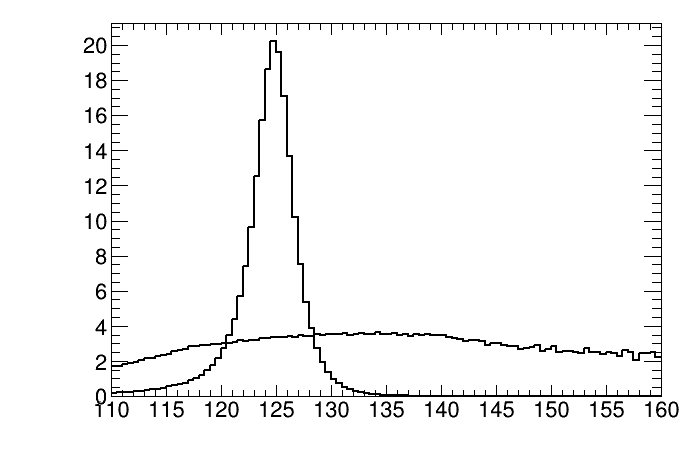

In [23]:
#plot the two histograms
c2 = ROOT.TCanvas("canv", "canv")
signal_hist.Draw("HIST")
bkg_hist.Draw("SAME HIST")
c2.Draw()

In [24]:
#Lets try to do something more interesting!
import utils
from data_retriever import get_df_safe, flatten_vector_branches

Using TensorFlow backend.


In [25]:
variables = t.keys()

In [26]:
#Lets take a look at variables related to the leptons
[v for v in variables if "lepton" in v.decode("utf8")]

[b'fsr_associated_lepton',
 b'extra_lepton_charge',
 b'extra_lepton_id',
 b'lepton_id',
 b'extra_lepton_eta',
 b'extra_lepton_m',
 b'extra_lepton_phi',
 b'extra_lepton_pt',
 b'lepton_eta',
 b'lepton_eta_truth_born',
 b'lepton_eta_truth_matched_bare',
 b'lepton_m',
 b'lepton_m_truth_born',
 b'lepton_m_truth_matched_bare',
 b'lepton_p',
 b'lepton_phi',
 b'lepton_phi_truth_born',
 b'lepton_phi_truth_matched_bare',
 b'lepton_pt',
 b'lepton_pt_constrained',
 b'lepton_pt_constrained_HM',
 b'lepton_pt_truth_born',
 b'lepton_pt_truth_matched_bare',
 b'lepton_res']

In [27]:
variables_to_retrieve = ["lepton_pt",\
                         "lepton_pt_truth_born",\
                         "lepton_eta",\
                         "lepton_eta_truth_born",\
                         "lepton_phi",\
                         "lepton_phi_truth_born"]
#Lets make a signal and background plot:
signal_dataframe = []
variables = ["m4l_constrained", "weight"]
for sf in full_signal_files:
    #concatenate the dataframes together
    signal_dataframe.append(get_df_safe(uproot.open(sf), "tree_incl_all", variables_to_retrieve + ["weight", "event_type"])[0])
import pandas as pd
signal_dataframe = pd.concat(signal_dataframe) 

background_dataframe = []
variables = ["m4l_constrained", "weight"]
for bf in full_bkg_files:
    #concatenate the dataframes together
    background_dataframe.append(get_df_safe(uproot.open(bf), "tree_incl_all", variables_to_retrieve + ["weight", "event_type"])[0])
import pandas as pd
background_dataframe = pd.concat(background_dataframe)

Frame retrieval took 3.0461814403533936 seconds
Frame retrieval took 3.7822842597961426 seconds
Frame retrieval took 5.566832780838013 seconds
Frame retrieval took 3.981203556060791 seconds
Frame retrieval took 4.50516152381897 seconds
Frame retrieval took 4.503058910369873 seconds
Frame retrieval took 3.9436445236206055 seconds
Frame retrieval took 6.605109214782715 seconds
Frame retrieval took 5.036912202835083 seconds
Frame retrieval took 3.9330883026123047 seconds
Frame retrieval took 3.9128332138061523 seconds
Frame retrieval took 5.8691558837890625 seconds
Frame retrieval took 3.645299196243286 seconds
Frame retrieval took 3.6626522541046143 seconds
Frame retrieval took 5.49758505821228 seconds


In [28]:
signal_dataframe

lepton_pt  lepton_pt_truth_born  lepton_eta  \
entry  subentry                                                
0      0         62.303513             61.111546    0.965409   
       1         28.206812             31.079718    0.768992   
       2         17.702475             18.786263    1.610212   
       3         13.633060             13.611411    0.739077   
1      0         39.197575             39.244278   -2.296885   
       1         46.301769             47.424046   -1.670532   
       2         10.337520             10.823170   -2.130835   
       3         23.283028             23.482737   -1.953171   
2      0         26.941252             26.612303   -2.428770   
       1         17.962627             18.046593    0.230406   
       2         17.492584             15.403642   -1.232129   
       3         21.369213             21.059816   -1.535157   
3      0         38.987186             37.853615   -1.252030   
       1         47.413017             46.454250   -1.905285   
       2         13.189660             13.448684   -1.608348   
       3         21.747501             23.850145   -1.351908   
4      0         34.219238             34.439129   -0.258571   
       1         57.786602             57.883472   -0.128959   
       2         16.246641             16.756968   -0.419534   
       3         15.405019             16.598572   -0.526974   
5      0         33.480923             34.097099    0.775077   
       1         52.901165             52.147873    1.545968   
       2          8.167327              7.965965    0.839502   
       3         34.972401             34.899845    0.938771   
6      0         41.981819             43.298176    2.168410   
       1         48.008507             48.192043    2.028327   
       2         11.996507             11.458351    1.463733   
       3         15.978916             15.933293    1.134216   
7      0         41.045547             41.388889    2.320887   
       1         83.461044             81.213684    1.437145   
...                    ...                   ...         ...   
675776 2         11.615153             13.046949   -1.996177   
       3         21.535187             22.025131   -2.167969   
675777 0         57.054054             60.369896    0.940461   
       1         36.167912             37.083088    0.561523   
       2          8.312533              8.503271    0.429642   
       3         24.888206             26.335070    1.064975   
675778 0         90.200714             92.702675   -1.031918   
       1         70.502739             68.567574   -0.092777   
       2         14.910672             15.004502   -1.123491   
       3         19.186024             19.726929   -0.122633   
675779 0         28.595524             30.509287   -0.301329   
       1         38.410210             37.588844    1.335524   
       2         23.097179             22.973557    0.922628   
       3          6.430292              6.898188   -0.647668   
675780 0         95.955978             98.592987   -1.853109   
       1         23.214205             19.934023   -0.345457   
       2         39.936066             43.946835   -1.264882   
       3          9.579711             10.355807   -1.878055   
675781 0         21.371351             21.486509    0.836602   
       1         70.004326             67.991943   -0.907069   
       2         37.225651             36.713947   -0.429662   
       3         17.832561             17.782507   -0.116877   
675782 0         47.436546             47.418270    0.210309   
       1         22.005531             21.809668   -0.532984   
       2         19.770473             20.268671   -0.418141   
       3         25.123640             25.566900    0.849729   
675783 0         43.910988             45.657711   -2.035553   
       1         57.564651             58.962418   -1.129697   
       2         34.640438             36.213463   -1.150535   
       3          9.578460              9.873401 

In [29]:
signal_dataframe_lepton1 = signal_dataframe.query("subentry==0 and event_type == 0") #the first muon
signal_dataframe_lepton2 = signal_dataframe.query("subentry==1 and event_type == 0") #the second muon
signal_dataframe_lepton3 = signal_dataframe.query("subentry==2 and event_type == 0") #the third muon
signal_dataframe_lepton4 = signal_dataframe.query("subentry==3 and event_type == 0") #the fourth muon
signal_lepton_frame = pd.concat([signal_dataframe_lepton1, signal_dataframe_lepton2, signal_dataframe_lepton3, signal_dataframe_lepton4])
signal_lepton_frame

lepton_pt  lepton_pt_truth_born  lepton_eta  \
entry  subentry                                                 
0      0          62.303513             61.111546    0.965409   
1      0          39.197575             39.244278   -2.296885   
5      0          33.480923             34.097099    0.775077   
6      0          41.981819             43.298176    2.168410   
7      0          41.045547             41.388889    2.320887   
12     0          20.763304             20.766460   -1.355795   
13     0          43.755177             45.029003    0.331250   
15     0          39.679306             43.130795    1.311390   
17     0          23.734980             23.795368    2.191002   
18     0         195.020721            196.507050    1.961211   
23     0          25.299942             26.141975   -1.245377   
24     0          27.516010             27.541210    0.796547   
25     0          77.455429             71.694237   -2.499263   
28     0          18.165390             24.231878   -2.013091   
35     0          35.300282             34.580124    1.096089   
38     0          70.184647             68.621338    1.800418   
40     0          42.428902             41.332783    1.318912   
41     0          28.546886             28.734241    0.872610   
43     0          22.022961             22.126165   -2.217205   
45     0          36.937252             39.685818   -2.113086   
48     0          44.308998             43.699577    1.174802   
58     0          23.977802             24.843887    1.617416   
59     0          38.325794             37.520622    2.524405   
62     0          42.907768             42.371803   -0.727725   
65     0          48.343079             48.653114   -1.031878   
74     0          28.938286             30.174469    0.851575   
79     0          47.550686             48.732140    1.043748   
80     0          29.686947             28.714132   -2.280277   
84     0          40.723190             48.122383    1.955907   
95     0          41.652405             44.313301   -1.066397   
...                     ...                   ...         ...   
675672 3          38.694080             38.231003    1.843939   
675673 3          68.249527             71.548149    0.961373   
675675 3           5.884072              5.844958   -1.320845   
675677 3          24.464140             25.021059    0.096893   
675689 3          35.927753             37.084820    0.843099   
675692 3         117.274353            108.750122    1.108363   
675695 3          23.442511             23.564346   -0.535468   
675696 3          24.728624             23.841858   -0.887101   
675697 3          23.928816             23.567238   -0.640453   
675699 3           5.399570              5.459447    0.312527   
675709 3          54.598518             53.871815    0.999331   
675710 3          22.743908             23.358969    0.794581   
675711 3           7.076374              7.139861   -0.011234   
675722 3         190.021561            197.986511   -0.933276   
675724 3          12.904170             12.870919   -0.307637   
675726 3           7.802107              7.742509    2.242592   
675727 3           7.434186              7.385139   -0.983644   
675728 3          26.492252             26.833771   -0.259577   
675736 3          30.413132             62.504112   -0.177260   
675745 3          16.430531             17.012787    0.762275   
675748 3          17.244823             17.547312   -0.038980   
675749 3          25.567560             25.551046    1.253911   
675754 3          30.932920             30.726200   -0.068928   
675760 3          27.747042             27.852453    0.250103   
675765 3          22.085352             22.046700   -0.149833   
675767 3           9.804586              9.641715   -0.873973   
675776 3          21.535187             22.025131   -2.167969   
675781 3          17.832561             17.782507   -0.116877   
675782 3          25.123640             25.566900    

In [30]:
#lets calculate the mismeasurement of each lepton:
signal_lepton_frame["x"] = signal_lepton_frame.eval("(lepton_pt - lepton_pt_truth_born)/lepton_pt_truth_born").values

In [31]:
signal_lepton_frame

lepton_pt  lepton_pt_truth_born  lepton_eta  \
entry  subentry                                                 
0      0          62.303513             61.111546    0.965409   
1      0          39.197575             39.244278   -2.296885   
5      0          33.480923             34.097099    0.775077   
6      0          41.981819             43.298176    2.168410   
7      0          41.045547             41.388889    2.320887   
12     0          20.763304             20.766460   -1.355795   
13     0          43.755177             45.029003    0.331250   
15     0          39.679306             43.130795    1.311390   
17     0          23.734980             23.795368    2.191002   
18     0         195.020721            196.507050    1.961211   
23     0          25.299942             26.141975   -1.245377   
24     0          27.516010             27.541210    0.796547   
25     0          77.455429             71.694237   -2.499263   
28     0          18.165390             24.231878   -2.013091   
35     0          35.300282             34.580124    1.096089   
38     0          70.184647             68.621338    1.800418   
40     0          42.428902             41.332783    1.318912   
41     0          28.546886             28.734241    0.872610   
43     0          22.022961             22.126165   -2.217205   
45     0          36.937252             39.685818   -2.113086   
48     0          44.308998             43.699577    1.174802   
58     0          23.977802             24.843887    1.617416   
59     0          38.325794             37.520622    2.524405   
62     0          42.907768             42.371803   -0.727725   
65     0          48.343079             48.653114   -1.031878   
74     0          28.938286             30.174469    0.851575   
79     0          47.550686             48.732140    1.043748   
80     0          29.686947             28.714132   -2.280277   
84     0          40.723190             48.122383    1.955907   
95     0          41.652405             44.313301   -1.066397   
...                     ...                   ...         ...   
675672 3          38.694080             38.231003    1.843939   
675673 3          68.249527             71.548149    0.961373   
675675 3           5.884072              5.844958   -1.320845   
675677 3          24.464140             25.021059    0.096893   
675689 3          35.927753             37.084820    0.843099   
675692 3         117.274353            108.750122    1.108363   
675695 3          23.442511             23.564346   -0.535468   
675696 3          24.728624             23.841858   -0.887101   
675697 3          23.928816             23.567238   -0.640453   
675699 3           5.399570              5.459447    0.312527   
675709 3          54.598518             53.871815    0.999331   
675710 3          22.743908             23.358969    0.794581   
675711 3           7.076374              7.139861   -0.011234   
675722 3         190.021561            197.986511   -0.933276   
675724 3          12.904170             12.870919   -0.307637   
675726 3           7.802107              7.742509    2.242592   
675727 3           7.434186              7.385139   -0.983644   
675728 3          26.492252             26.833771   -0.259577   
675736 3          30.413132             62.504112   -0.177260   
675745 3          16.430531             17.012787    0.762275   
675748 3          17.244823             17.547312   -0.038980   
675749 3          25.567560             25.551046    1.253911   
675754 3          30.932920             30.726200   -0.068928   
675760 3          27.747042             27.852453    0.250103   
675765 3          22.085352             22.046700   -0.149833   
675767 3           9.804586              9.641715   -0.873973   
675776 3          21.535187             22.025131   -2.167969   
675781 3          17.832561             17.782507   -0.116877   
675782 3          25.123640             25.566900    

In [32]:
import matplotlib.pyplot as plt
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*,...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported.
    
    The *bins*, *range*, *weights*, and *density* parameters behave as in
    `n

Text(0.5, 0, '(pt reco - pt true)/(pt true)')

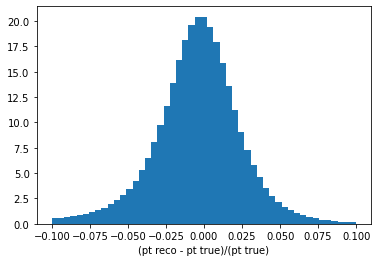

In [33]:
bins = np.linspace(-0.1, +0.1, 50)
plt.hist(signal_lepton_frame.eval("x").values, weights = signal_lepton_frame.eval("weight"), bins=bins)
plt.xlabel("(pt reco - pt true)/(pt true)")

Text(0.5, 0, '(pt reco - pt true)/(pt true)')

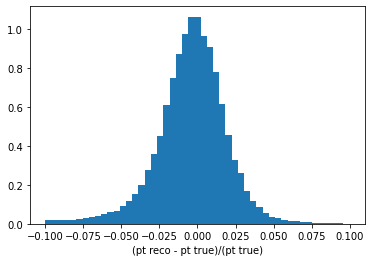

In [34]:
bins = np.linspace(-0.1, +0.1, 50)
#lets plot this in an eta and pt slice
selected_frame = signal_lepton_frame.query("(lepton_pt > 20.0) and (lepton_pt < 40.0) and (abs(lepton_eta) < 0.2)")
plt.hist(selected_frame.eval("x").values, weights = selected_frame.eval("weight"), bins=bins)
plt.xlabel("(pt reco - pt true)/(pt true)")

Text(0.5, 0, '(pt reco - pt true)/(pt true)')

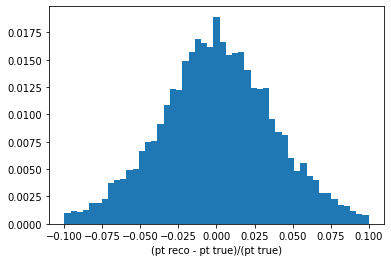

In [35]:
bins = np.linspace(-0.1, +0.1, 50)
#lets plot this in an eta and pt slice
selected_frame = signal_lepton_frame.query("(lepton_pt > 100.0) and (lepton_pt < 200.0) and (abs(lepton_eta) < 0.2)")
plt.hist(selected_frame.eval("x").values, weights = selected_frame.eval("weight"), bins=bins)
plt.xlabel("(pt reco - pt true)/(pt true)")

In [36]:
import workspace_manager
if not workspace_manager.check_for_variable("x"): roo_x = workspace_manager.get_variable("x", 0.0, -0.5, 0.5)
else: roo_x = workspace_manager.get_variable("x")
#if not workspace_manager.check_for_variable("weight"): roo_w = workspace_manager.get_variable("weight", 0.0, -10000000.0, 100000000.0)
roo_w = workspace_manager.get_variable("weight")    
roo_xw = ROOT.RooArgSet(*[roo_x, roo_w])

Adding x
Retrieving variable x
Adding weight
Retrieving variable weight

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [37]:
#you could similarly do
#roo_x = ROOT.RooRealVar("x", "x", 0.0, -0.5, 0.5)
#roo_w = ROOT.RooRealVar("weight", "weight", 0.0, -10000000.0, 100000000.0)
#roo_xw = ROOT.RooArgSet(*[roo_x, roo_w])

In [38]:
roo_w

<ROOT.RooRealVar object ("weight") at 0x1209bd30>

In [39]:
#this should retrieve the same variable. 
# You can see that the memory address of the variable is the same
workspace_manager.get_variable("weight")

Found variable weight
Found variable weight
Retrieving variable weight


<ROOT.RooRealVar object ("weight") at 0x1209bd30>

In [40]:
#OK lets covert our dataframe to a roodataset and do a fit

In [41]:
import root_numpy as rnp
selected_frame = signal_lepton_frame.query("(lepton_pt > 20.0) and (lepton_pt < 25.0) and (abs(lepton_eta) < 0.2)")
x = selected_frame.eval("x").values
w = selected_frame.eval("weight").values
for_tree = np.core.records.fromarrays([x,w], names=",".join(["x","weight"]))
tree_for_roodataset = rnp.array2tree(for_tree)
tree_for_roodataset
#OK now lets make a roodataset
x_dataset = ROOT.RooDataSet("Test", "Test", roo_xw, ROOT.RooFit.Import(tree_for_roodataset), ROOT.RooFit.WeightVar("weight"))
x_dataset
x_dataset.Print()

[#1] INFO:Eval -- RooAbsReal::attachToTree(x) TTree Float_t branch x will be converted to double precision
[#1] INFO:Eval -- RooTreeDataStore::loadValues(Test) Ignored 171 out of range events
RooDataSet::Test[x,weight:weight] = 57403 entries (3.70052 weighted)


In [42]:
#OK now lets do an unbinned fit to this roodataset
mean = ROOT.RooRealVar("mean","mean",0.0,-0.05,0.05)
sigma = ROOT.RooRealVar("sigma","sigma",0.1,0.0,0.5)
gaus = ROOT.RooGaussian("Gaus", "Gaus", roo_x, mean, sigma)


In [ ]:
gaus.fitTo(x_dataset, ROOT.RooFit.Strategy(2), ROOT.RooFit.Range(-0.05, 0.05))

In [ ]:
#roodatasets use a frame, so you can plot things on the dataframe like so:
xframe = roo_x.frame( ROOT.RooFit.Range(-0.2, 0.2) )
xframe.GetXaxis().SetTitle("#frac{P^{Truth}_{T} - P^{Reco}_{T}}{P^{Reco}_{T}}")
xframe.GetXaxis().SetTitleOffset(2.1)
gaus.plotOn(xframe)
x_dataset.plotOn(xframe)
canvas = ROOT.TCanvas("canv", "canv")
canvas.SetBottomMargin(0.3)
xframe.Draw()
canvas.Draw()